<a href="https://colab.research.google.com/github/ShabnamParveen/BlogSystem-Home/blob/main/Media_monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import pandas as dta_anlzr
import numpy as arr_hndlr
import matplotlib.pyplot as mtplt_lb
import seaborn as cbon
import plotly.offline as pltli_ofln
color = cbon.color_palette()
import plotly.graph_objs as p_gr_ob          #go
pltli_ofln.init_notebook_mode(connected=True)
import plotly.tools as  p_tul #tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')
import os
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as ex_ge_bst
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow #as tnsr_flo
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from prompt_toolkit.filters.utils import to_filter
from keras.utils.vis_utils import plot_model

In [ ]:
data_set = dta_anlzr.read_csv('/content/GrammarandProductReviews.csv.zip')
data_set.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [ ]:
data_set.iloc[:,20:25].head()

,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,Good,NaN,NaN,Dorothy W,73416000391
2,Good,NaN,NaN,Dorothy W,73416000391
3,Disappointed,NaN,NaN,Rebecca,67981934427
4,Irritation,NaN,NaN,Walker557,67981934427


#analysing the dataset

In [ ]:
data_set.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [ ]:
data_set.shape

(71044, 25)

In [ ]:
data_set.describe(include='all')

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
count,71044,71044,71044,71044,71044,39065,71044,70903,70841,71044,...,3.215800e+04,32508.000000,71044.000000,71044,71008,70568,5410,449,70948,71042
unique,600,392,581,598,354,473,600,463,583,600,...,NaN,NaN,NaN,22508,64913,42682,2282,52,58088,562
top,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",2015-09-11T18:17:13Z,2018-02-05T10:22:44Z,44600015996,"clorox/12992356,044600015996,cloroxdisinfectin...",Clorox,12992356,Clorox Disinfecting Wipes Value Pack Scented 1...,...,NaN,NaN,NaN,https://redsky.target.com/groot-domain-api/v1/...,Good,Great movie,Chicago,CA,An anonymous customer,44600015996
freq,8606,10700,8606,8606,13753,8606,8606,8607,8606,8606,...,NaN,NaN,NaN,196,26,1367,68,40,421,8606
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.944753e+07,0.410422,4.385747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.842696e+07,3.574442,1.067659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.187400e+04,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355342e+07,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.124763e+07,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.112628e+08,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_set.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.215800e+04,32508.000000,71044.000000
mean,7.944753e+07,0.410422,4.385747
std,4.842696e+07,3.574442,1.067659
min,2.187400e+04,0.000000,1.000000
25%,3.355342e+07,0.000000,4.000000
50%,7.124763e+07,0.000000,5.000000
75%,1.112628e+08,0.000000,5.000000
max,1.038227e+09,183.000000,5.000000


#finding null feeds

In [ ]:
data_set.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

#Since the prediction will be dependent upon the reviews and we can't fill any value or string stream into it if it has null string, therefore we should just remove those rows that have missing reviews, and removing these rows wont affect too much as we have only 36 rows as them.

In [ ]:
data_set = data_set.dropna(subset=['reviews.text'])

In [ ]:
data_set.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31977
keys                        0
manufacturer              141
manufacturerNumber        202
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38852
reviews.doRecommend     10581
reviews.id              38852
reviews.numHelpful      38502
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title             464
reviews.userCity        65598
reviews.userProvince    70559
reviews.username           96
upc                         2
dtype: int64

#as we can see in the above o/p the review.text column does not have any null value now, as we have removed them

#finding the most frequent words used by customers in their reviews

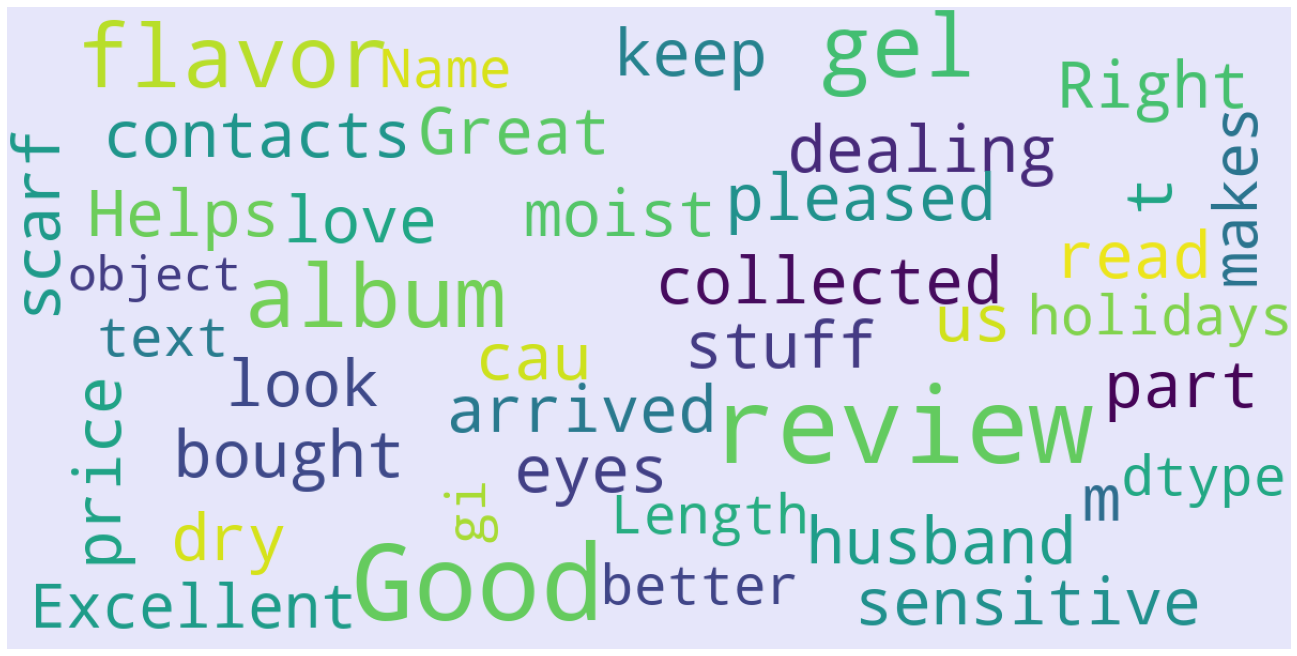

In [ ]:
stp_wd = set(STOPWORDS)

def rprsnt_wd(d_st, title = None):
    wordcloud = WordCloud(
        background_color='lavender', stopwords=stp_wd, max_words=197, max_font_size=33, scale=3, random_state=1).generate(str(d_st))

    fig = mtplt_lb.figure(1, figsize=(23, 23))
    mtplt_lb.axis('off')
    if title: 
        fig.suptitle(title, fontsize=17)
        fig.subplots_adjust(top=2.7)

    mtplt_lb.imshow(wordcloud)
    mtplt_lb.show()

rprsnt_wd(data_set['reviews.text'])

#finding the maximum no. of rating given by customers

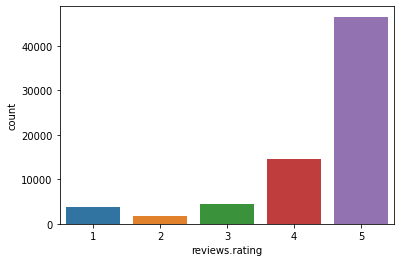

In [ ]:
cbon.countplot(data_set['reviews.rating'], label ='count')

#finding the correlation between the lenght of the review and the ratings

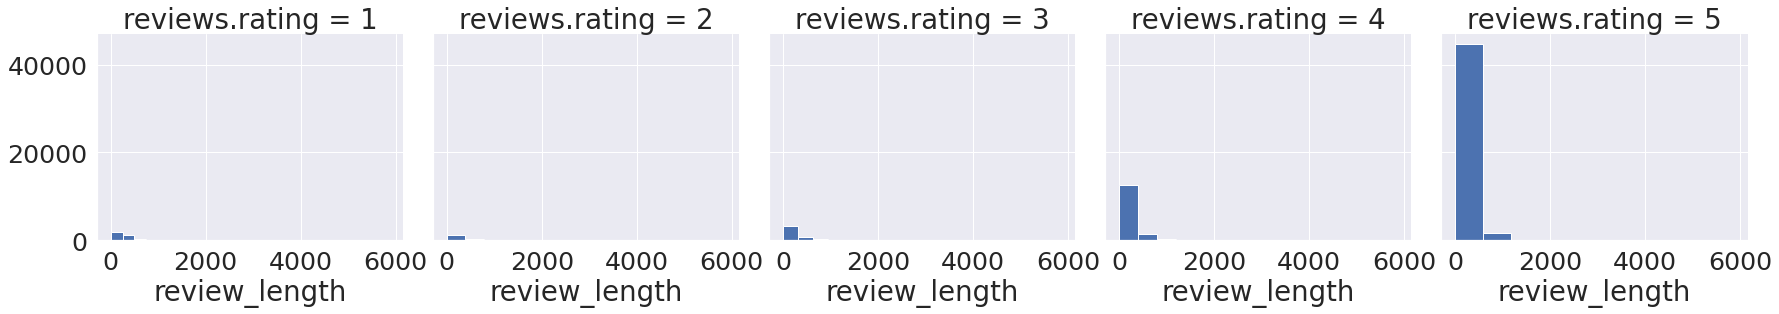

In [ ]:
data_set['review_length'] = data_set['reviews.text'].apply(len)

cbon.set(font_scale=2.3)

g_review_rating = cbon.FacetGrid(data_set, col='reviews.rating', size=5)
g_review_rating.map(mtplt_lb.hist, 'review_length')

#finding the fake reviews

In [ ]:
data_set['reviews.didPurchase'].fillna("Review N/A", inplace=True)

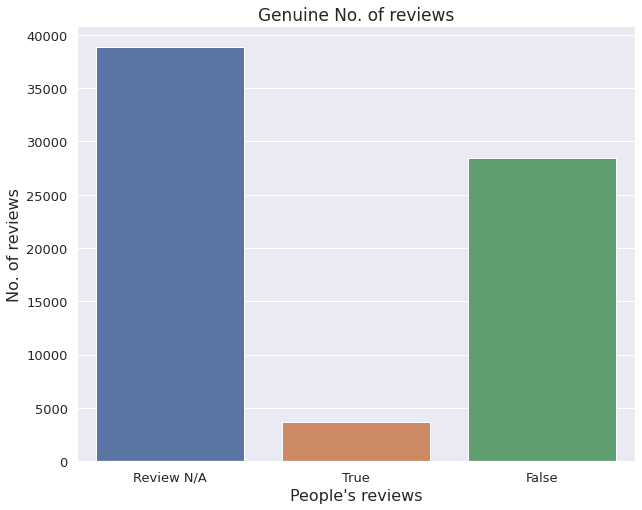

In [ ]:
mtplt_lb.figure(figsize=(10,8))
a_x_s=cbon.countplot(data_set['reviews.didPurchase'])
a_x_s.set_xlabel(xlabel="People's reviews", fontsize=16)
a_x_s.set_ylabel(ylabel='No. of reviews', fontsize=16)
a_x_s.axes.set_title('Genuine No. of reviews', fontsize=17)
a_x_s.tick_params(labelsize=13)

#finding the correlation among the numeric columns

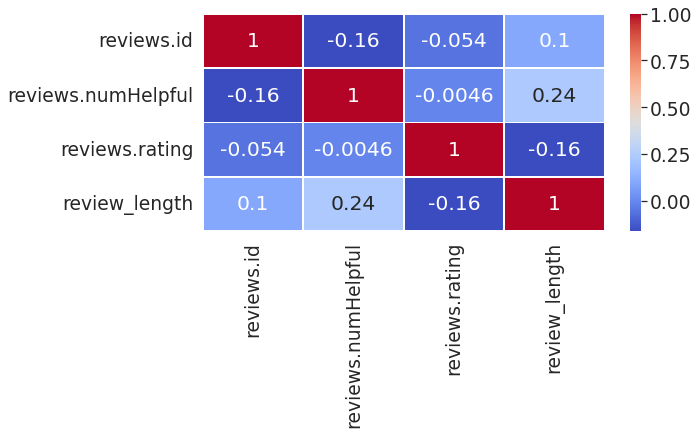

In [ ]:
cbon.set(font_scale=1.7)
mtplt_lb.figure(figsize = (9,4))
cbon.heatmap(data_set.corr(), cmap='coolwarm', annot=True, linewidths=.7)

#separating the reviews and ratings for making feature and taarget

In [ ]:
all_rvws_=data_set['reviews.text']
train_rvws_=data_set['reviews.text']
y=data_set['reviews.rating']

#finding the relevancy of words to the dataset

In [ ]:
wd_vctrzr = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
wd_vctrzr.fit(all_rvws_)
trained_words_features = wd_vctrzr.transform(train_rvws_)

In [ ]:
kar_vctrzr = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
kar_vctrzr.fit(all_rvws_)
trained_chars_features = kar_vctrzr .transform(train_rvws_)

train_phichars = hstack([trained_chars_features, trained_words_features])

#separating  Data__set into train, test sets where our feature---> reviews and target--->ratings

In [ ]:
x_trn_, x_tst, Y_trn_, Y_tst_ = train_test_split(train_phichars, y, test_size = 0.3, random_state = 103)

#    train a random forest classifier for the above subsets

In [ ]:
classifier_randomForest = RandomForestClassifier()
classifier_randomForest.fit(x_trn_, Y_trn_)
preds=classifier_randomForest.predict(x_tst)

#creating and training the ensemble model

In [ ]:
clasyfyr_exgibst = ex_ge_bst.XGBClassifier()

In [ ]:
clasyfyr_exgibst.fit(x_trn_, Y_trn_)

XGBClassifier(objective='multi:softprob')

In [ ]:
prds_exgibst = clasyfyr_exgibst.predict(x_tst)

# model performance

In [ ]:
classyfyr_rf_aqraci = accuracy_score(preds, Y_tst_)
classyfyr_xgb_aqraci = accuracy_score(prds_exgibst, Y_tst_)

In [ ]:
print("Random Forest Model accuracy:  ", classyfyr_rf_aqraci)
print("XGBoost Model accuracy:  ", classyfyr_xgb_aqraci)

Random Forest Model accuracy:   0.7217762756419284
XGBoost Model accuracy:   0.6956297235131202


In [ ]:
aqrac_rf = accuracy_score(preds, Y_tst_)
prcsn_rf = precision_score(preds, Y_tst_, average='micro')
rikaul_rf = recall_score(preds, Y_tst_, average='micro') 
ef_one_rf = f1_score(preds, Y_tst_, average='micro')
risalt = dta_anlzr.DataFrame([['Random Forest', 100*aqrac_rf , 100*prcsn_rf, 100*rikaul_rf, 100*ef_one_rf]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(risalt)

           Model   Accuracy  Precision     Recall   F1 Score
0  Random Forest  72.177628  72.177628  72.177628  72.177628


In [ ]:
aqrecy_xgb = accuracy_score(prds_exgibst, Y_tst_)
praecsn_xgb = precision_score(prds_exgibst, Y_tst_, average='micro')
rikaul_xgb = recall_score(prds_exgibst, Y_tst_, average='micro') 
ef_one_xgb = f1_score(prds_exgibst, Y_tst_, average='micro')
maudal_risalt = dta_anlzr.DataFrame([['XGBoost',100*aqrecy_xgb, 100*praecsn_xgb, 100*rikaul_xgb, 100*ef_one_xgb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

risalt = risalt.append(maudal_risalt, ignore_index = True)
print(risalt)

           Model   Accuracy  Precision     Recall   F1 Score
0  Random Forest  72.177628  72.177628  72.177628  72.177628
1        XGBoost  69.562972  69.562972  69.562972  69.562972


#using deep learning models to check whether it will work better.

In [ ]:
data_set['sentiments'] = data_set['reviews.rating']<4 #creating a new column 'sentiments'

#breaking the dataset

In [ ]:
trn_txt_st, tst_txt_st, trn_y, tst_y = train_test_split(data_set['reviews.text'],data_set['sentiments'], test_size = 0.3)

#tokenizing the dataset

In [ ]:
MX_NMBR_WDS = 20000

# getting raw txt dta
tren_crps = trn_txt_st.astype(str)
tst_crps = tst_txt_st.astype(str)

# vectorize the sets into a 2-dimentional int tensr

tokinyzar = Tokenizer(nb_words=MX_NMBR_WDS, char_level=False)
tokinyzar.fit_on_texts(tren_crps)
cqncs = tokinyzar.texts_to_sequences(tren_crps)
tst_cqncs = tokinyzar.texts_to_sequences(tst_crps)

wd_ndx = tokinyzar.word_index
print('unique tokens:    %s' % len(wd_ndx))

unique tokens:    24566


#padding the corpus as all should have equal length

In [ ]:
MX_CQNS_LNTH = 200
#pad sequences are used to bring all sentences to same size.
fichur_tren = pad_sequences(cqncs, maxlen=MX_CQNS_LNTH)
fichur_tst = pad_sequences(tst_cqncs, maxlen=MX_CQNS_LNTH)
print('train tensor: ', fichur_tren.shape)
print('test tensor: ', fichur_tst.shape)

train tensor:  (49705, 200)
test tensor:  (21303, 200)


#creating the LSTM learner

In [ ]:
maudal_lng_sht_tam = Sequential()
maudal_lng_sht_tam.add(Embedding(MX_NMBR_WDS, 128))
maudal_lng_sht_tam.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
maudal_lng_sht_tam.add(Dense(1, activation='sigmoid'))

#model summary

In [ ]:
maudal_lng_sht_tam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


#visualizing the model

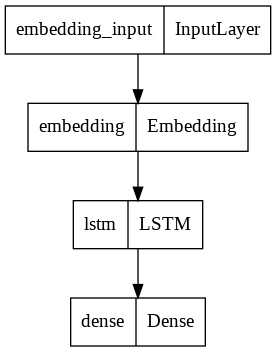

In [ ]:
keras.utils.plot_model(maudal_lng_sht_tam, to_file= 'pic_lstm_.png', show_layer_names=True)

#assigning checkpoints

In [ ]:
chheckpt = ModelCheckpoint("media_monitor.h5", monitor="loss", verbose=1, save_best_only=True)

#compiling the layers of the model

In [ ]:
maudal_lng_sht_tam.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

#training  lstm 

In [ ]:
tren_ricrd = maudal_lng_sht_tam.fit(fichur_tren, trn_y,
          batch_size=128,
          epochs=30,
          validation_data=(fichur_tst, tst_y), callbacks=[chheckpt])
print(maudal_lng_sht_tam)

Epoch 1/30
389/389 [==============================] - ETA: 0s - loss: 0.2653 - accuracy: 0.8978
Epoch 1: loss improved from inf to 0.26525, saving model to media_monitor.h5
389/389 [==============================] - 390s 997ms/step - loss: 0.2653 - accuracy: 0.8978 - val_loss: 0.2425 - val_accuracy: 0.9102
Epoch 2/30
389/389 [==============================] - ETA: 0s - loss: 0.1853 - accuracy: 0.9301
Epoch 2: loss improved from 0.26525 to 0.18534, saving model to media_monitor.h5
389/389 [==============================] - 391s 1s/step - loss: 0.1853 - accuracy: 0.9301 - val_loss: 0.2205 - val_accuracy: 0.9181
Epoch 3/30
389/389 [==============================] - ETA: 0s - loss: 0.1512 - accuracy: 0.9440
Epoch 3: loss improved from 0.18534 to 0.15122, saving model to media_monitor.h5
389/389 [==============================] - 403s 1s/step - loss: 0.1512 - accuracy: 0.9440 - val_loss: 0.2239 - val_accuracy: 0.9176
Epoch 4/30
389/389 [==============================] - ETA: 0s - loss: 0.12

#plotting the model accuracy and loss using graph

In [ ]:
def picturize_success(history, givn_lbl_):
    mtplt_lb.plot(history.history[givn_lbl_])
    mtplt_lb.xlabel("Epochs")
    mtplt_lb.ylabel(givn_lbl_)
    mtplt_lb.show()

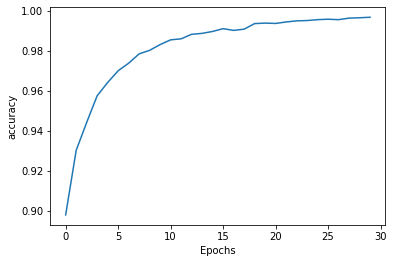

In [ ]:
picturize_success(tren_ricrd, 'accuracy')

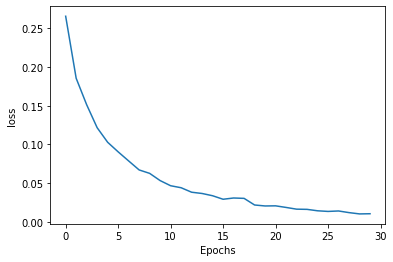

In [ ]:
picturize_success(tren_ricrd, 'loss')

In [ ]:
lng_sht_tam_loss_and_metrics = maudal_lng_sht_tam.evaluate(fichur_tst, tst_y, batch_size=128)
print("Accuracy : "+str(lng_sht_tam_loss_and_metrics[1]))

167/167 [==============================] - 28s 170ms/step - loss: 0.6859 - accuracy: 0.9051
Accuracy : 0.9051307439804077
